In [378]:
#packages
import numpy as np
import random
import matplotlib.pyplot as plt

In [379]:
#reading the data into a list
file = r"C:\Users\mmitkina\Downloads\wiki-talk-temporal.txt\wiki-talk-temporal.txt"
f = open(file, "r")
data = []
for x in f:
    a = x
    a = a.split()
    data.append([int(a[0]), int(a[1]), int(a[2])])

In [380]:
#creating the dictionary of edges (unreasonably slow) 
dict_vert_undir = {}
times_span = {}
times_mean = {}
times_count = {}
for k in data:
    if k[0] not in dict_vert_undir.keys():    
        dict_vert_undir[k[0]] = [k[1]]
        #times[k[0]] = [k[2]]
    else:
        if k[1] not in dict_vert_undir[k[0]]:
            dict_vert_undir[k[0]].append(k[1])
        #times[k[0]].append(k[2])
            
    if k[1] not in dict_vert_undir.keys():
        dict_vert_undir[k[1]] = [k[0]]
    else:
        if k[0] not in dict_vert_undir[k[1]]:
            dict_vert_undir[k[1]].append(k[0])
            
    if k[0] not in times_span.keys():
        times_span[k[0]] = [k[2], k[2]]
        times_count[k[0]] = 1
        times_mean[k[0]] = k[2]
    else:
        if k[2] < times_span[k[0]][0]:
            times_span[k[0]][0] = k[2]
        if k[2] > times_span[k[0]][1]:
            times_span[k[0]][1] = k[2] 
        times_count[k[0]] += 1
        times_mean[k[0]] = times_mean[k[0]]*(1.0*(times_count[k[0]]-1)/times_count[k[0]]) + k[2]*1.0/times_count[k[0]]
        
f.close()
data = []

In [381]:
max_ind = 0
max_degr = 0
for i in dict_vert_undir:
    if len(dict_vert_undir[i])>max_degr:
        max_degr = len(dict_vert_undir[i])
        max_ind = i

In [382]:
init = 1034
nodes = []
nodes.append(init)
#degrees_rw.append(len(dict_vert_undir[init]))
for j in range(500000):
    init = 1034
    if j%10000 == 0:
        visited = set(nodes)
        nodes = list(visited)
        print(j, len(visited))
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_rw.append(len(dict_vert_undir[init]))
    for i in range(100):
        next_step = random.choice(dict_vert_undir[init])
        #degrees_rw.append(len(dict_vert_undir[next_step]))
        nodes.append(next_step)  
        init = next_step
#plt.hist(degrees_rw, 1000, range=(0, 10000), log = True)
#plt.show()

0 1
10000 298200
20000 478370
30000 606836
40000 702808
50000 776442
60000 834017
70000 878905
80000 915610
90000 945531
100000 969814
110000 989681
120000 1006041
130000 1019506
140000 1030839
150000 1040352
160000 1048347
170000 1055137
180000 1060745
190000 1065426
200000 1069448
210000 1072887
220000 1075789
230000 1078155
240000 1080241
250000 1081954
260000 1083409
270000 1084699
280000 1085780
290000 1086607
300000 1087361
310000 1088006
320000 1088566
330000 1089069
340000 1089457
350000 1089782
360000 1090097
370000 1090305
380000 1090515
390000 1090696
400000 1090836
410000 1090962
420000 1091076
430000 1091166
440000 1091240
450000 1091307
460000 1091371
470000 1091420
480000 1091464
490000 1091501


In [383]:
#real distribution in the largest subgraph
degrees_actual_subgraph = []
for i in dict_vert_undir:
    if i in visited:
        degrees_actual_subgraph.append(len(dict_vert_undir[i]))
#plt.hist(degrees_actual, 1000, range=(0, 10000), log = True)
#plt.hist(degrees_actual_subgraph, 1000, range=(0, 10000), log = True, color = 'r')
#plt.show()

In [384]:
#real distribution
degrees_actual = []
for i in dict_vert_undir:
    degrees_actual.append(len(dict_vert_undir[i]))
#plt.hist(degrees_actual, 1000, range=(0, 10000), log = True)
#plt.show()

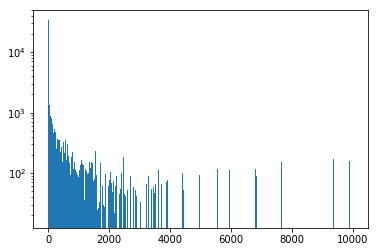

In [385]:
#random walk
degrees_rw = []
nodes = []

init = random.choice(list(visited))
nodes.append(init)
degrees_rw.append(len(dict_vert_undir[init]))
for j in range(1):
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_rw.append(len(dict_vert_undir[init]))
    for i in range(100000):
        next_step = random.choice(dict_vert_undir[init])
        degrees_rw.append(len(dict_vert_undir[next_step]))
        nodes.append(next_step)
        init = next_step
plt.hist(degrees_rw, 1000, range=(0, 10000), log = True)
plt.show()

In [386]:
#RWRW - unlike other methods, this one gives the probability distribution 
# rather than the list of degrees
dict_rw = {}
for i in degrees_rw:
    if i in dict_rw.keys():
        dict_rw[i] += 1
    else:
        dict_rw[i] = 1
denominator = 0
for i in dict_rw:
    denominator += dict_rw[i]*1.0/i
values = [0]*max(list(dict_rw.keys()))
for i in range(len(values)):
    if i in dict_rw.keys():
        values[i] = (dict_rw[i]*1.0/i)/denominator
        
#x = range(10000)
#plt.plot(x, values)
#plt.xlim((0,1000))
#plt.yscale('log')
#plt.show()

In [387]:
#M-H
degrees_mh = []
nodes = []
k = 0
init = random.choice(list(visited))
degrees_mh.append(len(dict_vert_undir[init])) 
for j in range(5000):
   # print(j)
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(1):
        next_step = random.choice(dict_vert_undir[init])
        p = np.random.uniform()
        if p < (len(dict_vert_undir[init])*1.0/len(dict_vert_undir[next_step])):
            degrees_mh.append(len(dict_vert_undir[next_step]))
            init = next_step
degrees_mh = []            
for j in range(10000):
    #print(j)
   # init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(500):
        nodes.append(next_step)
        next_step = random.choice(dict_vert_undir[init])
        p = np.random.uniform()
        if p < (len(dict_vert_undir[init])*1.0/len(dict_vert_undir[next_step])):
            degrees_mh.append(len(dict_vert_undir[next_step]))
            init = next_step
            k +=1
#plt.hist(degrees_mh, 1000,range=(0, 10000), log = True)
#plt.show()

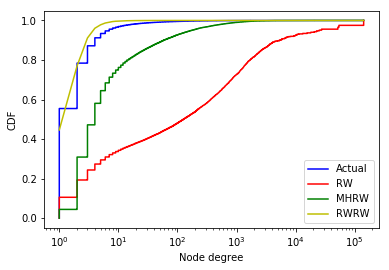

In [388]:
#ecdf('count1', data1)
x1 = degrees_actual_subgraph
x1_val, cdf1 = np.sort(x1), np.arange(1, len(x1) + 1) / len(x1)
x2 = degrees_rw
x2_val, cdf2 = np.sort(x2), np.arange(1, len(x2) + 1) / len(x2)
x3 = degrees_mh
x3_val, cdf3 = np.sort(x3), np.arange(1, len(x3) + 1) / len(x3)
x4 = [1]*len(values)
for i in range(len(x4)):
    x4[i] = x4[i]-values[i]
plt.step(x1_val, cdf1, color = 'b', label='Actual')
plt.step(x2_val, cdf2, color = 'r', label='RW')
plt.step(x3_val, cdf3, color = 'g', label='MHRW')
plt.plot(range(1, len(x4)), x4[1:], color = 'y', label='RWRW')
#plt.xscale('log')
#ecdf('count2', data2)
plt.xscale('log')
plt.legend()
#plt.xlim((1,50))
plt.xlabel('Node degree')
plt.ylabel('CDF')
plt.show()

In [392]:
# counts
##actual
count_actual_subgraph = []
for i in dict_vert_undir:
    if i in visited:
        if i in times_count.keys():
            count_actual_subgraph.append(times_count[i])
        else:
            count_actual_subgraph.append(0)
#random walk
count_rw = []
nodes = []
init = random.choice(list(visited))
nodes.append(init)
degrees_rw.append(len(dict_vert_undir[init]))
for j in range(1):
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_rw.append(len(dict_vert_undir[init]))
    for i in range(100000):
        next_step = random.choice(dict_vert_undir[init])
        degrees_rw.append(len(dict_vert_undir[next_step]))
        if i in times_count.keys():
            count_rw.append(times_count[i])
        else:
            count_rw.append(0)
        init = next_step
#M-H
count_mh = []
nodes = []
k = 0
init = random.choice(list(visited))
if init in times_count.keys():
    count_mh.append(times_count[init])
else:
    count_mh.append(0)
#count_mh.append(len(dict_vert_undir[init])) 
for j in range(5000):
   # print(j)
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(1):
        next_step = random.choice(dict_vert_undir[init])
        p = np.random.uniform()
        if p < (len(dict_vert_undir[init])*1.0/len(dict_vert_undir[next_step])):
            init = next_step
            if init in times_count.keys():
                count_mh.append(times_count[init])
            else:
                count_mh.append(0)
count_mh = []            
for j in range(10000):
    #print(j)
   # init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(500):
        nodes.append(next_step)
        next_step = random.choice(dict_vert_undir[init])
        p = np.random.uniform()
        if p < (len(dict_vert_undir[init])*1.0/len(dict_vert_undir[next_step])):
            init = next_step
            if init in times_count.keys():
                count_mh.append(times_count[init])
            else:
                count_mh.append(0)
            k +=1
#RWRW - unlike other methods, this one gives the probability distribution 
# rather than the list of degrees
dict_rw_count = {}
dict_rw_count[0] = []
for i in visited:
    if i in times_count.keys():
        if times_count[i] in dict_rw_count.keys():
            dict_rw_count[times_count[i]].append(i)
        else:
            dict_rw_count[times_count[i]] = [i]
    else:
        dict_rw_count[0].append(i)
denominator = 0
for i in dict_rw_count:
    for j in dict_rw_count[i]:
        denominator += 1.0/len(dict_vert_undir[j])
count_rwrw = [0]*max(list(dict_rw_count.keys()))
for i in range(len(count_rwrw)):
    if i in dict_rw_count.keys():
        for j in dict_rw_count[i]:
            count_rwrw[i] += (1.0/len(dict_vert_undir[j]))/denominator

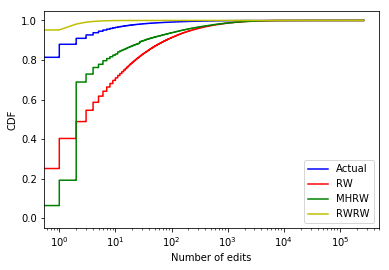

In [397]:
x1 = count_actual_subgraph
x1_val, cdf1 = np.sort(x1), np.arange(1, len(x1) + 1) / len(x1)
x2 = count_rw
x2_val, cdf2 = np.sort(x2), np.arange(1, len(x2) + 1) / len(x2)
x3 = count_mh
x3_val, cdf3 = np.sort(x3), np.arange(1, len(x3) + 1) / len(x3)
x4 = [1]*len(count_rwrw)
for i in range(len(x4)):
    x4[i] = x4[i]-count_rwrw[i]
plt.step(x1_val, cdf1, color = 'b', label='Actual')
plt.step(x2_val, cdf2, color = 'r', label='RW')
plt.step(x3_val, cdf3, color = 'g', label='MHRW')
plt.plot(range(0, len(x4)), x4, color = 'y', label='RWRW')
#plt.xscale('log')
#ecdf('count2', data2)
plt.xscale('log')
plt.xlabel('Number of edits')
plt.ylabel('CDF')
plt.legend()
#plt.xlim((1,50))
plt.show()

In [398]:
for i in times_span.keys():
    times_span[i] = (times_span[i][1]-times_span[i][0])/(1.0*3600*24)

In [399]:
# counts
##actual
span_actual_subgraph = []
for i in dict_vert_undir:
    if i in visited:
        if i in times_span.keys():
            span_actual_subgraph.append(times_span[i]+1)
        else:
            span_actual_subgraph.append(0)
#random walk
span_rw = []
nodes = []
init = random.choice(list(visited))
#nodes.append(init)
#degrees_rw.append(len(dict_vert_undir[init]))
for j in range(1):
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_rw.append(len(dict_vert_undir[init]))
    for i in range(100000):
        next_step = random.choice(dict_vert_undir[init])
        #degrees_rw.append(len(dict_vert_undir[next_step]))
        if init in times_span.keys():
            span_rw.append(times_span[init]+1)
        else:
            span_rw.append(0)
        init = next_step
#M-H
span_mh = []
nodes = []
k = 0
init = random.choice(list(visited))
#if init in times_span.keys():
#    span_mh.append(times_span[init]+1)
#else:
#    span_mh.append(0)
#count_mh.append(len(dict_vert_undir[init])) 
for j in range(5000):
   # print(j)
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(1):
        next_step = random.choice(dict_vert_undir[init])
        p = np.random.uniform()
        if p < (len(dict_vert_undir[init])*1.0/len(dict_vert_undir[next_step])):
            init = next_step
            #if init in times_count.keys():
            #    count_mh.append(times_count[init])
            #else:
            #    count_mh.append(0)
span_mh = []            
for j in range(10000):
    #print(j)
   # init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(50):
        nodes.append(next_step)
        if init in times_span.keys():
                span_mh.append(times_span[init]+1)
        else:
            span_mh.append(0)
        #span_mh.append(times_span[init]+1)
        next_step = random.choice(dict_vert_undir[init])
        p = np.random.uniform()
        if p < (len(dict_vert_undir[init])*1.0/len(dict_vert_undir[next_step])):
            init = next_step
            k +=1
            
#RWRW - unlike other methods, this one gives the probability distribution 
# rather than the list of degrees
dict_rw_span = {}
dict_rw_span[0] = []
for i in visited:
    if i in times_span[i]:
        if times_span[i] in times_span.keys():
            dict_rw_span[times_span[i]].append(i)
        else:
            dict_rw_span[times_span[i]] = [i]
    else:
        dict_rw_span[0].append(i)
denominator = 0
for i in dict_rw_span:
    for j in dict_rw_span[i]:
        denominator += 1.0/len(dict_vert_undir[j])
span_rwrw = [0]*max(list(dict_rw_span.keys()))
for i in range(len(span_rwrw)):
    if i in dict_rw_span.keys():
        for j in dict_rw_span[i]:
            span_rwrw[i] += (1.0/len(dict_vert_undir[j]))/denominator

TypeError: argument of type 'float' is not iterable

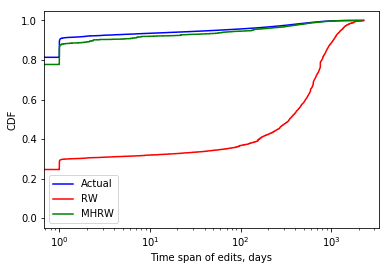

In [401]:
x1 = span_actual_subgraph
x1_val, cdf1 = np.sort(x1), np.arange(1, len(x1) + 1) / len(x1)
x2 = span_rw
x2_val, cdf2 = np.sort(x2), np.arange(1, len(x2) + 1) / len(x2)
x3 = span_mh
x3_val, cdf3 = np.sort(x3), np.arange(1, len(x3) + 1) / len(x3)
#x4 = [1]*len(span_rwrw)
#for i in range(len(x4)):
#    x4[i] = x4[i]-span_rwrw[i]
plt.step(x1_val, cdf1, color = 'b', label='Actual')
plt.step(x2_val, cdf2, color = 'r', label='RW')
plt.step(x3_val, cdf3, color = 'g', label='MHRW')
#plt.plot(range(0, len(x4)), x4, color = 'y', label='RWRW')
#plt.xscale('log')
#ecdf('count2', data2)
plt.xscale('log')
plt.xlabel('Time span of edits, days')
plt.ylabel('CDF')
plt.legend()

#plt.xlim((1,50))
plt.show()

In [436]:
visited1=set()
for i in visited:
    visited1.add(i)

In [437]:
dict_dropped = {}
for i in dict_vert_undir.keys():
    dict_dropped[i] = []
    for j in dict_vert_undir[i]:
        dict_dropped[i].append(j)

In [438]:
for i in visited:
    if len(dict_dropped[i])==1:
        p = np.random.uniform()
        if p > 0.2:
            dict_dropped[dict_dropped[i][0]].remove(i)
            visited1.remove(i)
            del dict_dropped[i]

In [439]:
#real distribution in the largest subgraph
degrees_actual_subgraph_dropped = []
for i in dict_dropped:
    if i in visited1:
        degrees_actual_subgraph_dropped.append(len(dict_dropped[i]))

In [440]:
len([i for i  in degrees_actual_subgraph_dropped if i==1])

120941

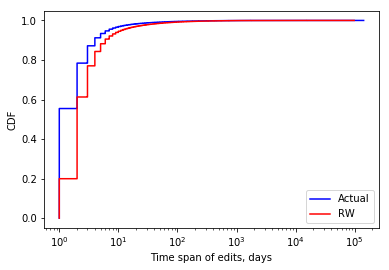

In [441]:
x1 = degrees_actual_subgraph
x1_val, cdf1 = np.sort(x1), np.arange(1, len(x1) + 1) / len(x1)
x2 = degrees_actual_subgraph_dropped
x2_val, cdf2 = np.sort(x2), np.arange(1, len(x2) + 1) / len(x2)
#x3 = span_mh
#x3_val, cdf3 = np.sort(x3), np.arange(1, len(x3) + 1) / len(x3)
#x4 = [1]*len(span_rwrw)
#for i in range(len(x4)):
#    x4[i] = x4[i]-span_rwrw[i]
plt.step(x1_val, cdf1, color = 'b', label='Actual')
plt.step(x2_val, cdf2, color = 'r', label='RW')
#plt.step(x3_val, cdf3, color = 'g', label='MHRW')
#plt.plot(range(0, len(x4)), x4, color = 'y', label='RWRW')
#plt.xscale('log')
#ecdf('count2', data2)
plt.xscale('log')
plt.xlabel('Time span of edits, days')
plt.ylabel('CDF')
plt.legend()

#plt.xlim((1,50))
plt.show()

In [442]:
#degrees - dropped
#random walk
degrees_rw_dropped = []
nodes = []

init = random.choice(list(visited1))
nodes.append(init)
degrees_rw_dropped.append(len(dict_dropped[init]))
for j in range(1):
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_rw.append(len(dict_vert_undir[init]))
    for i in range(100000):
        next_step = random.choice(dict_dropped[init])
        degrees_rw_dropped.append(len(dict_dropped[next_step]))
        nodes.append(next_step)
        init = next_step
#RWRW - unlike other methods, this one gives the probability distribution 
# rather than the list of degrees
dict_rw_dropped = {}
for i in degrees_rw_dropped:
    if i in dict_rw_dropped.keys():
        dict_rw_dropped[i] += 1
    else:
        dict_rw_dropped[i] = 1
denominator = 0
for i in dict_rw_dropped:
    denominator += dict_rw_dropped[i]*1.0/i
values_degrees_dropped = [0]*max(list(dict_rw_dropped.keys()))
for i in range(len(values_degrees_dropped)):
    if i in dict_rw_dropped.keys():
        values_degrees_dropped[i] = (dict_rw_dropped[i]*1.0/i)/denominator
        
#M-H
degrees_mh_dropped = []
nodes = []
k = 0
init = random.choice(list(visited1))
degrees_mh_dropped.append(len(dict_dropped[init])) 
for j in range(5000):
   # print(j)
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(1):
        next_step = random.choice(dict_dropped[init])
        p = np.random.uniform()
        if p < (len(dict_dropped[init])*1.0/len(dict_dropped[next_step])):
            degrees_mh_dropped.append(len(dict_dropped[next_step]))
            init = next_step
degrees_mh_dropped = []            
for j in range(10000):
    #print(j)
   # init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(500):
        nodes.append(next_step)
        next_step = random.choice(dict_dropped[init])
        p = np.random.uniform()
        if p < (len(dict_dropped[init])*1.0/len(dict_dropped[next_step])):
            degrees_mh_dropped.append(len(dict_dropped[next_step]))
            init = next_step
            k +=1

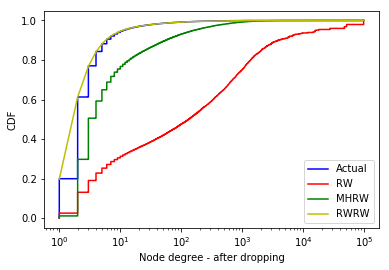

In [443]:
x1 = degrees_actual_subgraph_dropped
x1_val, cdf1 = np.sort(x1), np.arange(1, len(x1) + 1) / len(x1)
x2 = degrees_rw_dropped
x2_val, cdf2 = np.sort(x2), np.arange(1, len(x2) + 1) / len(x2)
x3 = degrees_mh_dropped
x3_val, cdf3 = np.sort(x3), np.arange(1, len(x3) + 1) / len(x3)
x4 = [1]*len(values_degrees_dropped)
x4[0] = values_degrees_dropped[0]
for i in range(1, len(x4)):
    x4[i] = values_degrees_dropped[i]+x4[i-1]
plt.step(x1_val, cdf1, color = 'b', label='Actual')
plt.step(x2_val, cdf2, color = 'r', label='RW')
plt.step(x3_val, cdf3, color = 'g', label='MHRW')
plt.plot(range(1, len(x4)), x4[1:], color = 'y', label='RWRW')
#plt.xscale('log')
#ecdf('count2', data2)
plt.xscale('log')
plt.legend()
#plt.xlim((1,50))
plt.xlabel('Node degree - after dropping')
plt.ylabel('CDF')
plt.show()

In [444]:
# counts
##actual
span_actual_subgraph_dropped = []
for i in dict_dropped:
    if i in visited1:
        if i in times_span.keys():
            span_actual_subgraph_dropped.append(times_span[i]+1)
        else:
            span_actual_subgraph_dropped.append(0)
#random walk
span_rw_dropped = []
nodes = []
init = random.choice(list(visited1))
#nodes.append(init)
#degrees_rw.append(len(dict_vert_undir[init]))
for j in range(1):
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_rw.append(len(dict_vert_undir[init]))
    for i in range(100000):
        next_step = random.choice(dict_dropped[init])
        #degrees_rw.append(len(dict_vert_undir[next_step]))
        if init in times_span.keys():
            span_rw_dropped.append(times_span[init]+1)
        else:
            span_rw_dropped.append(0)
        init = next_step
#M-H
span_mh_dropped = []
nodes = []
k = 0
init = random.choice(list(visited1))
#if init in times_span.keys():
#    span_mh.append(times_span[init]+1)
#else:
#    span_mh.append(0)
#count_mh.append(len(dict_vert_undir[init])) 
for j in range(5000):
   # print(j)
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(1):
        next_step = random.choice(dict_dropped[init])
        p = np.random.uniform()
        if p < (len(dict_dropped[init])*1.0/len(dict_dropped[next_step])):
            init = next_step
            #if init in times_count.keys():
            #    count_mh.append(times_count[init])
            #else:
            #    count_mh.append(0)
span_mh_dropped = []            
for j in range(10000):
    #print(j)
   # init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(50):
        nodes.append(next_step)
        if init in times_span.keys():
                span_mh_dropped.append(times_span[init]+1)
        else:
            span_mh_dropped.append(0)
        #span_mh.append(times_span[init]+1)
        next_step = random.choice(dict_dropped[init])
        p = np.random.uniform()
        if p < (len(dict_dropped[init])*1.0/len(dict_dropped[next_step])):
            init = next_step
            k +=1
            
#RWRW - unlike other methods, this one gives the probability distribution 
# rather than the list of degrees
dict_rw_span_dropped = {}
dict_rw_span_dropped[0] = []
for i in visited1:
    if i in times_span[i]:
        if times_span[i] in times_span.keys():
            dict_rw_span_dropped[times_span[i]].append(i)
        else:
            dict_rw_span_dropped[times_span[i]] = [i]
    else:
        dict_rw_span_dropped[0].append(i)
denominator = 0
for i in dict_rw_span_dropped:
    for j in dict_rw_span_dropped[i]:
        denominator += 1.0/len(dict_dropped[j])
span_rwrw_dropped = [0]*max(list(dict_rw_span_dropped.keys()))
for i in range(len(span_rwrw_dropped)):
    if i in dict_rw_span_dropped.keys():
        for j in dict_rw_span_dropped[i]:
            span_rwrw_dropped[i] += (1.0/len(dict_dropped[j]))/denominator

TypeError: argument of type 'float' is not iterable

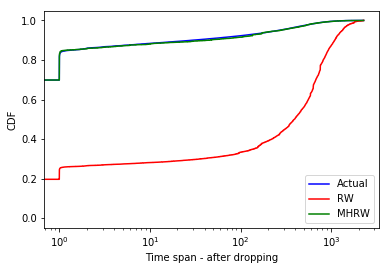

In [450]:
x1 = span_actual_subgraph_dropped
x1_val, cdf1 = np.sort(x1), np.arange(1, len(x1) + 1) / len(x1)
x2 = span_rw_dropped
x2_val, cdf2 = np.sort(x2), np.arange(1, len(x2) + 1) / len(x2)
x3 = span_mh_dropped
x3_val, cdf3 = np.sort(x3), np.arange(1, len(x3) + 1) / len(x3)
#x4 = [1]*len(span_rwrw_dropped)
#x4[0] = span_rwrw_dropped[0]
#for i in range(1, len(x4)):
#    x4[i] = span_rwrw_dropped[i]+x4[i-1]
plt.step(x1_val, cdf1, color = 'b', label='Actual')
plt.step(x2_val, cdf2, color = 'r', label='RW')
plt.step(x3_val, cdf3, color = 'g', label='MHRW')
#plt.plot(range(1, len(x4)), x4[1:], color = 'y', label='RWRW')
#plt.xscale('log')
#ecdf('count2', data2)
plt.xscale('log')
plt.legend()
#plt.xlim((1,50))
plt.xlabel('Time span - after dropping')
plt.ylabel('CDF')
plt.show()

In [446]:
# counts
##actual
count_actual_subgraph_dropped = []
for i in dict_dropped:
    if i in visited1:
        if i in times_count.keys():
            count_actual_subgraph_dropped.append(times_count[i])
        else:
            count_actual_subgraph_dropped.append(0)
#random walk
count_rw_dropped = []
nodes = []
init = random.choice(list(visited1))
nodes.append(init)
count_rw_dropped.append(len(dict_dropped[init]))
for j in range(1):
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_rw.append(len(dict_vert_undir[init]))
    for i in range(100000):
        next_step = random.choice(dict_dropped[init])
        count_rw_dropped.append(len(dict_dropped[next_step]))
        if i in times_count.keys():
            count_rw_dropped.append(times_count[i])
        else:
            count_rw_dropped.append(0)
        init = next_step
#M-H
count_mh_dropped = []
nodes = []
k = 0
init = random.choice(list(visited1))
if init in times_count.keys():
    count_mh_dropped.append(times_count[init])
else:
    count_mh_dropped.append(0)
#count_mh.append(len(dict_vert_undir[init])) 
for j in range(5000):
   # print(j)
    #init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(1):
        next_step = random.choice(dict_dropped[init])
        p = np.random.uniform()
        if p < (len(dict_dropped[init])*1.0/len(dict_dropped[next_step])):
            init = next_step
            if init in times_count.keys():
                count_mh_dropped.append(times_count[init])
            else:
                count_mh_dropped.append(0)
count_mh_dropped = []            
for j in range(10000):
    #print(j)
   # init = random.choice(list(dict_vert_undir.keys()))
    #degrees_mh.append(len(dict_vert_undir[init])) 
    for i in range(500):
        nodes.append(next_step)
        next_step = random.choice(dict_dropped[init])
        p = np.random.uniform()
        if p < (len(dict_dropped[init])*1.0/len(dict_dropped[next_step])):
            init = next_step
            if init in times_count.keys():
                count_mh_dropped.append(times_count[init])
            else:
                count_mh_dropped.append(0)
            k +=1
#RWRW - unlike other methods, this one gives the probability distribution 
# rather than the list of degrees
dict_rw_count_dropped = {}
dict_rw_count_dropped[0] = []
for i in visited1:
    if i in times_count.keys():
        if times_count[i] in dict_rw_count_dropped.keys():
            dict_rw_count_dropped[times_count[i]].append(i)
        else:
            dict_rw_count_dropped[times_count[i]] = [i]
    else:
        dict_rw_count_dropped[0].append(i)
denominator = 0
for i in dict_rw_count_dropped:
    for j in dict_rw_count_dropped[i]:
        denominator += 1.0/len(dict_dropped[j])
count_rwrw_dropped = [0]*max(list(dict_rw_count_dropped.keys()))
for i in range(len(count_rwrw_dropped)):
    if i in dict_rw_count_dropped.keys():
        for j in dict_rw_count_dropped[i]:
            count_rwrw_dropped[i] += (1.0/len(dict_dropped[j]))/denominator

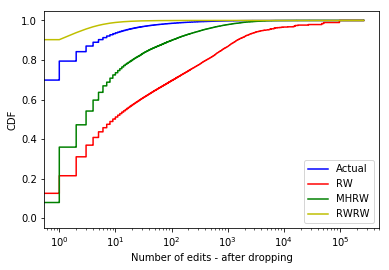

In [449]:
x1 = count_actual_subgraph_dropped
x1_val, cdf1 = np.sort(x1), np.arange(1, len(x1) + 1) / len(x1)
x2 = count_rw_dropped
x2_val, cdf2 = np.sort(x2), np.arange(1, len(x2) + 1) / len(x2)
x3 = count_mh_dropped
x3_val, cdf3 = np.sort(x3), np.arange(1, len(x3) + 1) / len(x3)
x4 = [1]*len(count_rwrw_dropped)
x4[0] = count_rwrw_dropped[0]
for i in range(1, len(x4)):
    x4[i] = count_rwrw_dropped[i]+x4[i-1]
plt.step(x1_val, cdf1, color = 'b', label='Actual')
plt.step(x2_val, cdf2, color = 'r', label='RW')
plt.step(x3_val, cdf3, color = 'g', label='MHRW')
plt.plot(range(0, len(x4)), x4, color = 'y', label='RWRW')
#plt.xscale('log')
#ecdf('count2', data2)
plt.xscale('log')
plt.legend()
#plt.xlim((1,50))
plt.xlabel('Number of edits - after dropping')
plt.ylabel('CDF')
plt.show()